# Homework for Regression & Classification
In **Part 0** we will download California housing dataset, which will be used for Part 1 and Part 2 of this homework.

In **Part 1** (20 points) we will implement single variable linear regression. These formulas are derived and presented in the Regression lecture, slide 17. You may only use functions from the Numpy library. You may NOT use any prebuilt linear regression functions available in scikit-learn, scipy, statsmodels, glm, lm, caret, or any other library. Doing so will result in a **0 score** for Part 1. If in doubt, feel free to clarify what library is allowed (and what is not) via Slack.

In **Part 2** (20 points) we will implement multiple variable linear regression. These formulas are derived and presented in the Regression lecture, slide 20-22. You may only use functions from the Numpy library. You may NOT use any prebuilt linear regression functions available in scikit-learn, scipy, statsmodels, glm, lm, caret, or any other library. Doing so will result in a **0 score** for Part 2. If in doubt, feel free to clarify what library is allowed (and what is not) via Slack.

In **Part 3** we will load MNIST data and compare performance between unregularized and L1 regularized logistic regression for Parts 4 through 6 of this homework.  

In **Part 4** (15 points) you will instantiate, fit, and predict without regularization.

In **Part 5** (25 points) you will instantiate, fit, and predict with L1 regularization and 5-fold cross validation.

In **Part 6** (20 points) we will compare the performance between these two approaches, and assess the pictoral changes associated with using fewer pixels/features.



# **Part 0**
Load California housing dataset.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

# California Housing dataset
# --------------------------

# **Data Set Characteristics:**

#     :Number of Instances: 20640

#     :Number of Attributes: 8 numeric, predictive attributes and the target

#     :Attribute Information:
#         - MedInc        median income in block group
#         - HouseAge      median house age in block group
#         - AveRooms      average number of rooms per household
#         - AveBedrms     average number of bedrooms per household
#         - Population    block group population
#         - AveOccup      average number of household members
#         - Latitude      block group latitude
#         - Longitude     block group longitude

#     :Missing Attribute Values: None

# This dataset was obtained from the StatLib repository.
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

# The target variable is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

# This dataset was derived from the 1990 U.S. census, using one row per census
# block group. A block group is the smallest geographical unit for which the U.S.
# Census Bureau publishes sample data (a block group typically has a population
# of 600 to 3,000 people).

# A household is a group of people residing within a home. Since the average
# number of rooms and bedrooms in this dataset are provided per household, these
# columns may take surprisingly large values for block groups with few households
# and many empty houses, such as vacation resorts.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Part 1**
*   Implement single variable linear regression.
*   Calculate the coefficients of a linear regression equation between the MedHouseVal column (median value of homes in $1000's) and the AveRooms column (average number of rooms per dwelling).


In [2]:
import numpy as np

class single_LR_implementation:
  def __init__(self):
    self.slope = None
    self.intercept = None

  def fit(self,X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    numerator = np.sum((X - X_mean) * (Y - Y_mean))
    denominator = np.sum((X - X_mean) ** 2)
    self.slope = numerator / denominator ### Replace "None" with your code (5 points)
    self.intercept = Y_mean - (self.slope * X_mean) ### Replace "None" with your code (5 points)

  def predict(self,X):
    if self.slope==None or self.intercept==None:
      print("Please fit the data before running predict")
    else:
      Y_hat = self.slope * X + self.intercept ### Replace "None" with your code (2 points)
      return Y_hat

In [3]:
##Test your implementation of single linear regression.

X = df['AveRooms'].to_numpy()
Y = df['MedHouseVal'].to_numpy()

singleLR = single_LR_implementation()
singleLR.fit(X,Y)

#Calculate the MSE
y_hat = singleLR.predict(X) ### Replace "None" with your code (4 points)
mse = np.mean((Y - y_hat) ** 2) ### Replace "None" with your code (4 points)

print('Your slope is: ',singleLR.slope)
print('Your intercept is: ',singleLR.intercept)

#Compare the slope and intercept values with your implementation's outputs.
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X.reshape((len(X),1)),Y)
print('Sklearn slope is: ',reg.coef_[0])
print('Sklearn intercept is: ',reg.intercept_)

Your slope is:  0.07086879328040555
Your intercept is:  1.6838115086404823
Sklearn slope is:  0.07086879328040553
Sklearn intercept is:  1.6838115086404823


# **Part 2**
*   Implement multiple variable linear regression. (Hint: use slides 20-22 from lecture 7).
*   Calculate the coefficients of a linear regression equation between the MedHouseVal column (median value of homes in $1000's) and all other columns.

In [4]:
import numpy as np

class multi_LR_implementation:
  def __init__(self):
    self.values = None

  def fit(self,X,Y):
    X_transpose = X.T
    self.values = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y ### Replace "None" with your code - (hint: Implement the formula on slide 18) (10 points)

  def predict(self,X):
    if self.values==None:
      print("Please fit the data before running predict")
    else:
      Y_hat = X @ self.values ### Replace "None" with your code (2 points)
      return Y_hat

In [5]:
### Test code
X = df.drop(['MedHouseVal'],axis=1).to_numpy()
Y = df['MedHouseVal'].to_numpy()
X_modified = np.hstack((np.ones(X.shape[0]).reshape((X.shape[0],1)),X))

#Why are the 3 lines of code above necessary? Why is X padded with a column of 1s to create X_modified? (4 points).

The 3 lines of code are necessary as they account for the values (x,y) and the intercept to generate the linear regression line as arrays. The column of 1s is needed to take the intercept in the linear regression model into account. Without this then the model would be limited by only utilzing the coefficents of the input features. Also the line would automatically pass through the origin which may skew the predicitions.

In [6]:
multiLR = multi_LR_implementation()
multiLR.fit(X_modified,Y)

print(multiLR.values)

# What does the first value from multiLR.values represent? How about the second? And third? (4 points)

[-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]


The first value represents the y-intercept. The second and third represent the coefficent of the 1st independant variable (slope) and the second independant variable respectively.

# **Part 3**
Load MNIST training and testing data.


In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[0:60000,:,:].reshape((60000, 28*28))  # flatten the image for the convenient of downstream analysis
X_test = X_test[0:10000,:,:].reshape((10000, 28*28))  # flatten the image for the convenient of downstream

#We will only be working with the "0"s and "1"s in the MNIST data for this homework
X_train = X_train[np.where((y_train==0) | (y_train==1))[0],:]
y_train = y_train[np.where((y_train==0) | (y_train==1))[0]]

X_test = X_test[np.where((y_test==0) | (y_test==1))[0],:]
y_test = y_test[np.where((y_test==0) | (y_test==1))[0]]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
#We have provided a helper function to calculate the AUC using sklearn:
from sklearn.metrics import roc_auc_score
def calculateAUC(trueLabels,predProbabilities):
  return roc_auc_score(trueLabels,predProbabilities)

# **Part 4**
Apply logistic regression on the pixels to predict "0"s and "1"s. Do not use regularization for Part 4.


In [9]:
#We suggest using this function:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score

#Fit a LogisticRegression model to the X_train data.
#Use a random_state of 123 with no regularization/penalty.
lr = LogisticRegression(penalty=None, random_state=123, solver='lbfgs') ### Replace "None" with your code (5 points)
lr.fit(X_train, y_train)
y_test_pred_label = lr.predict(X_test)

#Predict the labels and probabilities on the test set using the model you just fitted above.
y_test_pred_label = lr.predict(X_test) ### Replace "None" with your code (3 points)
y_test_pred_prob = lr.predict_proba(X_test)[:, 1] ### Replace "None" with your code (3 points)

#Finally, print the accuracy the AUC of your test set performance.
accuracy = accuracy_score(y_test, y_test_pred_label)
print(accuracy) ### Replace "None" with your code (2 point)
auc = roc_auc_score(y_test, y_test_pred_prob)
print(auc) ### Replace "None" with your code (2 point)

0.9990543735224586
0.9999964038478828


# **Part 5**
Apply LASSO with 5-fold cross validation on the pixels to predict "0"s and "1"s. Use L1 regularization in Part 5.


In [10]:
#We suggest using this function:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

#Fit a LogisticRegressionCV model to the X_train data.
#Use a random_state of 123, with L1 penalty, 5-fold cross validation. You may use any solver parameter.
lrcv = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=10, cv=5, random_state=123, max_iter=1000) ### Replace "None" with your code (5 points)
lrcv.fit(X_train, y_train)

#Predict the labels and probabilities on the test set using the model you just fitted above.
y_test_pred_l1_label = lrcv.predict(X_test) ### Replace "None" with your code (3 points)
y_test_pred_l1_prob = lrcv.predict_proba(X_test)[:, 1] ### Replace "None" with your code (3 points)

#Finally, print the accuracy the AUC of your test set performance.
accuracy = accuracy_score(y_test, y_test_pred_l1_label)
print(accuracy) ### Replace "None" with your code (2 point)
auc = roc_auc_score(y_test, y_test_pred_l1_prob)
print(auc) ### Replace "None" with your code (2 point)

0.9995271867612293
1.0


0.046415888336127774


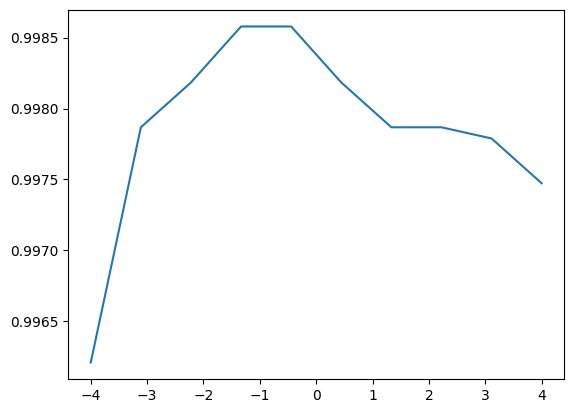

In [11]:
#LASSO regression requires a hyperparameter search of the regularization parameter to determine the "best value" for the L1 penalty (defined as Cs in LogisticRegressionCV)
#Let's create a plot of the L1 penalty values (x-axis) against accuracy (y-axis).

#(1) Because we did 5-fold validation, we need to first average the accuracies.
CVaccuracies = lrcv.scores_[1]
CVaccuracies.shape #Notice how this is shaped as 5x10, where each row is from the 5-fold split, and each column is the accuracy from 1 of 10 L1 parameter values

#Average these values by column, so that each Cs penalty value has a single accuracy score across the 5-folds.
CVaccuracies_mean = np.mean(CVaccuracies, axis=0) ### Replace "None" with your code (2 points)

#(2) Plot the L1 penalty values (defined as Cs_ in LogisticRegressionCV) against the CVaccuracies_mean:
from matplotlib import pyplot as plt
plt.plot(np.log10(lrcv.Cs_), CVaccuracies_mean) ### Replace None with x and y values (3 points)

#(3) Based on the above plot, what penalty parameter is best? (2 points)

#(4) What penalty value did LogisticRegressionCV select for you in the above code block. (3 points)
best_C = lrcv.C_[0]
print(best_C)


3. The best penalty parameter is very close to zero. I'm not sure how to zoom in closer.

4. .046

# **Part 6**
Let's evaluate the performance differences between unregularized (Part 4) regularized (Part 5) logistic regression.


In [12]:
#Describe the accuracy and AUC differences between Part 4 and Part 5. Did L1 perform better, worse, or the same? (4 points)

From what I can see, the methods used in Part 5 generated higher accuracy and auc scores (< .001 difference however). Because of this, it would appear that L1 regularized logistic regression has performed better compared to the non-regularized model.

In [13]:
#How many features were non-zero with L1 regularization? (4 points)
# Get the coefficients from the fitted LASSO logistic regression model
coefficients = lrcv.coef_[0]
# Count the number of non-zero coefficients
non_zero_features = np.sum(coefficients != 0)

print(f"Number of non-zero features with L1 regularization: {non_zero_features}")

Number of non-zero features with L1 regularization: 170


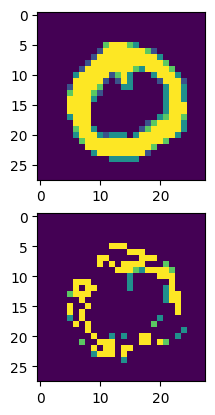

In [14]:
#In this section, we will plot the non-zero pixels to compare what an image looks like before and after L1 regularization.
from matplotlib import pyplot as plt
import numpy as np

#Let's copy the 300th image in the test set.
original_image = X_test[300,:].copy()

#Convert all pixels/features in the original_image that were not selected with L1 regularization to be 0.
#Assign this output to a new variable "regularized_image"
regularized_image = original_image.copy()
regularized_image[lrcv.coef_[0] == 0] = 0  ### Replace "None" with your code (6 points)


#Here we'll plot the original_image and regularized_image side-by-side.
fig,ax=plt.subplots(2)
ax[0].imshow(original_image.reshape((28,28)))
ax[1].imshow(regularized_image.reshape((28,28)))

#Describe what difference you see. (6 points)

The top image appears to be more cohesive as a shape/collection of pixels and resembles a "0". There are minor skews of other groupings of pixels in the image but not enough to be difficult to see what it is. The bottom image however, appears to be incomplete, with more dispersed groupings of pixels and it is more difficult to tell what the true shape is. After re-reading material and asking GPT it says: Only the important pixels (as determined by the model) will remain, while unimportant pixels are zeroed out for the regularized image.